# 🚗 Car Price Prediction using Machine Learning

## 📌 Objective
To build and evaluate multiple regression models to predict car prices based on various car features.

## 📂 Dataset
- Source: CarPrice_Assignment.csv  
- Contains information such as brand, engine type, horsepower, fuel type, and price.

In [50]:
#loading libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [29]:
#loading dataset
data=pd.read_csv("CarPrice_Assignment.csv")

In [30]:
#Quick look at data and describing it
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [32]:
data.shape

(205, 26)

## 🧹 Data Preprocessing
- Extracted car brand names from `CarName`
- Fixed spelling errors (`vw → volkswagen`, `toyouta → toyota`, etc.)
- Removed unnecessary columns (`car_ID`, `CarName`)
- Handled categorical features with one-hot encoding

In [33]:


data["brand"]=data["CarName"].str.split(" ").str[0].str.lower()
data['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [34]:
#fixing tying errors in features

data["brand"].replace({"maxda":"mazda","porcshce":"porsche","toyouta":"toyota","vokswagen":"volkswagen","vw":"volkswagen"},inplace=True)
data["brand"].unique()

/tmp/ipython-input-465336920.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["brand"].replace({"maxda":"mazda","porcshce":"porsche","toyouta":"toyota","vokswagen":"volkswagen","vw":"volkswagen"},inplace=True)


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [35]:
#dropping unwanted features
data.drop(['car_ID',"CarName"],axis=1,inplace=True)

In [36]:
#checking data and looking for missing values if any
data.head()
print(data.isnull().sum())

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
dtype: int64


In [37]:
#one hot encoding categorical variables
data=pd.get_dummies(data,columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","brand"],drop_first=True)

In [38]:
#splitting data into features and target variable
x=data.drop("price",axis=1)
y=data["price"]

## ⚙️ Feature Scaling
- Applied `StandardScaler` to numerical features

In [39]:
#splitting data into training and testing set with 80-20 ratio and using feature scaling
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaling=StandardScaler()
x_train_scaled=scaling.fit_transform(x_train)
x_test_scaled=scaling.transform(x_test)

# Training Models
- Linear Regression  
- Ridge Regression  
- Lasso Regression  
- Decision Tree Regressor  
- Random Forest Regressor  
- Gradient Boosting Regressor

In [40]:
#using baseline linear regression model

model=LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [41]:
#Ridge Regression

ridge=Ridge(alpha=0.1)
ridge.fit(x_train_scaled,y_train)
ridge_pred=ridge.predict(x_test_scaled)

In [42]:
#Lasso Regression

lasso=Lasso(alpha=0.01)
lasso.fit(x_train_scaled,y_train)
lasso_pred=lasso.predict(x_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.541e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


In [43]:
#Decision Tree

tree=DecisionTreeRegressor()
tree.fit(x_train_scaled,y_train)
tree_pred=tree.predict(x_test_scaled)

In [44]:
#Random Forest

forest=RandomForestRegressor()
forest.fit(x_train_scaled,y_train)
forest_pred=forest.predict(x_test_scaled)

In [45]:
#Gradient Boosting

boosting=GradientBoostingRegressor()
boosting.fit(x_train_scaled,y_train)
boosting_pred=boosting.predict(x_test_scaled)

# Model Evaluation

In [46]:
#Evalutating methods

def evaluate(y_true,y_pred,name):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  print(f"{name:20} R²: {r2:.3f} | RMSE: {rmse:.2f} | MAE: {mae:.2f}")

In [47]:
print("Model Performance Comparison:")
evaluate(y_test, y_pred, "Linear Regression")
evaluate(y_test, ridge_pred, "Ridge Regression")
evaluate(y_test, lasso_pred, "Lasso Regression")
evaluate(y_test, tree_pred, "Decision Tree")
evaluate(y_test,forest_pred, "Random Forest")
evaluate(y_test,boosting_pred, "Gradient Boosting")

Model Performance Comparison:
Linear Regression    R²: 0.910 | RMSE: 2669.93 | MAE: 1763.57
Ridge Regression     R²: 0.910 | RMSE: 2668.14 | MAE: 1769.73
Lasso Regression     R²: 0.901 | RMSE: 2793.77 | MAE: 1807.75
Decision Tree        R²: 0.911 | RMSE: 2648.71 | MAE: 1764.92
Random Forest        R²: 0.957 | RMSE: 1845.14 | MAE: 1266.37
Gradient Boosting    R²: 0.925 | RMSE: 2440.89 | MAE: 1717.61


✅ **Random Forest performed best overall.**

# Actual vs Predicted Prices

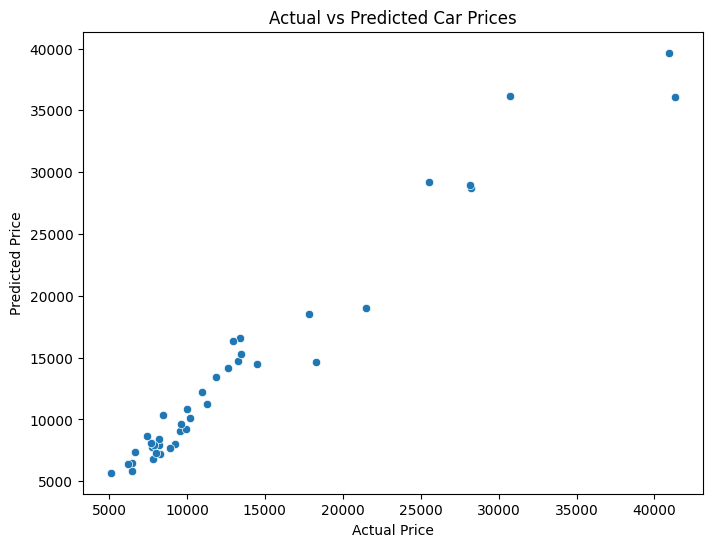

In [48]:
#plotting actual vs predicted prices plot using random forest

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=forest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

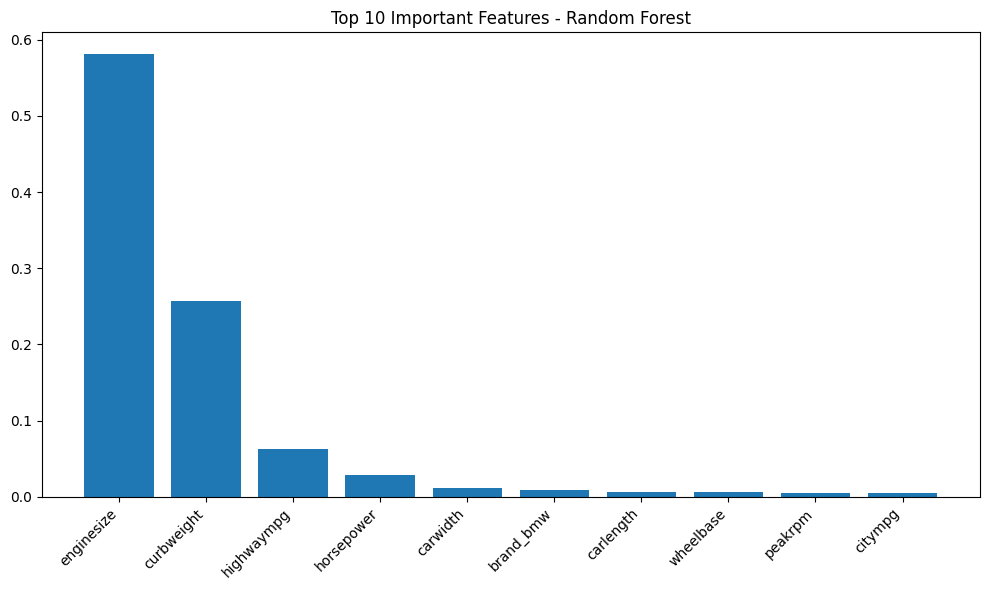

In [49]:
# Feature importances from Random Forest
importances = forest.feature_importances_
features = x_train.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

#top 10 features
top_n = 10
indices = indices[:top_n]

plt.figure(figsize=(10,6))
plt.title("Top 10 Important Features - Random Forest")
plt.bar(range(top_n), importances[indices])
plt.xticks(range(top_n),features[indices],rotation=45,ha='right')
plt.tight_layout()
plt.show()


## 💡 Insights
- **Engine power and car dimensions** strongly influence price.  
- Brand reputation also plays a significant role in determining car value.